# Part 1: Quick Examples of Python

Here are some quick examples of calculations and data analysis in python. Examine the code. Make changes and see what they do. 

## Python Notebooks and Documentation

Observe how every example can be documented with text and typeset math equations. But, most important of all, all the math in your data analysis is documented in the python code itself. Whatever you write in the text, the code is the truth. If you made an error, you will find it in the code. If you want to find out how a result was obtained from a data set, the method will be in the code.

If you print this notebook out as a PDF file and include it in your thesis, all the code will be visible for inspection by those who follow.

## Hookes Law

Calculating the frequency of a C–H bond using Hooke's law. $$\bar{\nu} = \frac{1}{2\pi c}\sqrt\frac{k}{\mu}$$ where $\mu$ is the *reduced mass* of the two atoms with masses $m_1$ and $m_2$ $$\mu = \frac{m_1m_2}{m_1+m_2}$$ and $k$ is the force constant for the vibration.



In [2]:
# Find frequency of IR vibration
import scipy.constants as spc   # predefined constant library
import numpy as np              # math tools

c = spc.c * 100          # speed of light: convert m.s^-1 to cm.s^-1
pi = spc.pi              # pi to many decimal places
N = spc.Avogadro         # Avogadro's number (mole^-1)

k = 5E5      # 5x10^5 dynes/cm -- the force constant of a C-H bond stretch
m1 = 1 / N   # mass of an individual carbon atom
m2 = 12 / N  # mass of an individual hydrogen atom



u = m1*m2 / (m1+m2)      # reduced mass
v = 1 / (2*pi*c) * np.sqrt(k/u)   # Hooke's law

print(f"The frequency is {v:0.1f} cm^-1")

The frequency is 3032.1 cm^-1


## Plotting Data

The code below takes two lists of numbers, $x$ and $y$, and plots them on a graph. The `plt.plot()` command makes the plot, the rest are all style. Examine the code. Change things and break things. Have fun.

The data is for the enzyme-catalyzed hydrolysis of p-nitrophenylacetate at pH 7.1 in the presence of an extract of pineapple juice. The enzyme *pectinmethylesterase*, EC 3.1.1.11, is most likely the source of the catalysis. 

Below is a simple plot. Observe all we need is $x$ and $y$ data and a plot command. Its that simple.

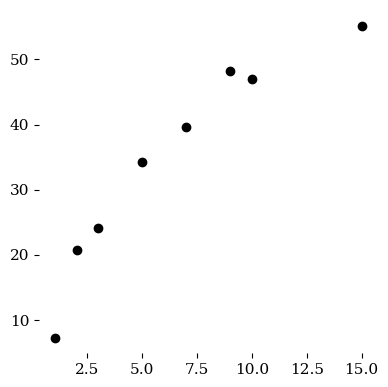

In [3]:
import matplotlib.pyplot as plt    # plotting tools
conc = [1,  2,  3,  5,  7,  9, 10, 15]                  # units are mM
rate = [7.3, 20.7, 24.1, 34.3, 39.6, 48.2, 47.0, 55.2]  # units are uM/min
plt.plot(conc, rate, "ko")          # plot the data as black "k" points "o"
plt.show()


### The Sample Plot with Style

mkdir: plots: File exists


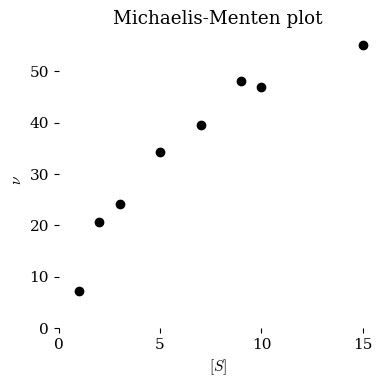

In [4]:
### Setup environment for Google Colab

import matplotlib.pyplot as plt    # plotting tools
!mkdir plots

### This is the data
conc = [1,  2,  3,  5,  7,  9, 10, 15]                  # units are mM
rate = [7.3, 20.7, 24.1, 34.3, 39.6, 48.2, 47.0, 55.2]  # units are uM/min

##### PLOT COMMANDS #####

plt.figure(figsize=(4,4))  # create a new blank plot

plt.plot(conc, rate, "ko") # plot the data as black "k" points "o"

plt.xlim(0,None)           # set axis limits so the plot starts at the origin
plt.ylim(0,None)
plt.xlabel(r"$[S]$")       # label the two axis
plt.ylabel(r"$\nu$")
plt.title("Michaelis-Menten plot")

plt.tight_layout()         # Prevents axis lables from falling off edge of plot
plt.savefig("plots/basics_plot1.pdf")   # save the plot to this file
plt.show()                 # show the plot in this notebook and clear it

## Data Analysis - Linear Regression

A famous (or infamous) method for analyzing enzyme kinetics is the Lineweaver-Burke equation. It is a double-reciprocal plot. We must convert the $x$ and $y$ values to $1/x$ and $1/y$. The $y$-intercept will be $1/V_{max}$ and the slope will be $K_M/V_{max}$. From this plot we can determine these two kinetic parameters for the enzyme and its substrate.

The code below demonstrates these calculations, the plot and a linear regression line fit to obtain the slope and intercept.

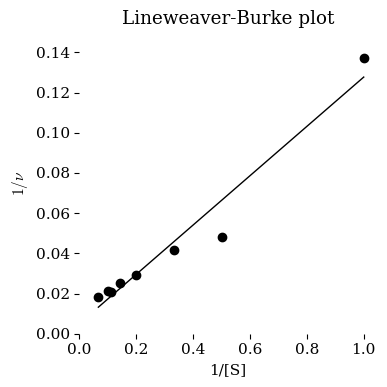

The intercept is 0.0050
The slope is 0.1227
The RSQ is 0.96
The Vmax is 198.8730
The KM is 24.4023


In [5]:
import matplotlib.pyplot as plt    # plotting tools
import numpy as np                 # we need the array object
import scipy

conc = [1,  2,  3,  5,  7,  9, 10, 15]                  # units are mM
rate = [7.3, 20.7, 24.1, 34.3, 39.6, 48.2, 47.0, 55.2]  # units are uM/min

##### MATH COMMANDS #####

conc = np.array(conc)  # convert lists to numpy arrays to allow math operations 
rate = np.array(rate)  #  that lists do not possess.

x = 1/conc   # reciprocal values for double reciprocal plot
y = 1/rate

# calculate line fit and returns an object containing parameters 
result = scipy.stats.linregress(x,y)  

intercept = result.intercept   # get the slope and intercept from result object
slope = result.slope

y_predicted = slope * x + intercept   # calculate the predicted line 

##### PLOT COMMANDS #####

plt.figure(figsize=(4,4))       # create a new blank plot

plt.plot(x, y, "ko")      # plot the data as black "k" points "o"
plt.plot(x, y_predicted, "k-")  # plot the predicted line as black "k" line "-"

plt.xlim(0,None)          # set axis limits so the plot starts at the origin
plt.ylim(0,0.15)
plt.xlabel(r"1/[S]")      # label the two axis
plt.ylabel(r"$1/\nu$")
plt.title(r"Lineweaver-Burke plot")

plt.tight_layout()        # Prevents axis lables from falling off edge of plot
plt.savefig("plots/basics_plot2.pdf")   # save the plot to this file
plt.show()                # show the plot in this notebook and clear it

vmax_lb = 1/intercept
KM_lb = slope * vmax_lb

##### PRINT REPORT #####

print(f"The intercept is {intercept:0.4f}") 
print(f"The slope is {slope:0.4f}") 
print(f"The RSQ is {result.rvalue ** 2:0.2f}")
print(f"The Vmax is {vmax_lb:0.4f}") 
print(f"The KM is {KM_lb:0.4f}") 


## Data Analysis - Non-linear Regression

We can fit data to any function and so are not limited to linear fits. The `scipy.optimize.curve_fit` tool will optimized parameters to obtain the best fit of x and y to a function that you define.

The code below demonstrates these calculations, the plot and a curve fit to obtain the best-fit parameters.

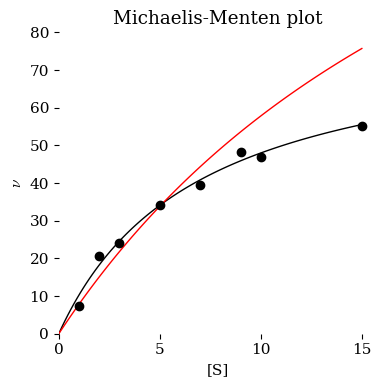

The Vmax is 81.0018
The KM is 6.8834
The red line is the predicted curve using Lineweaver-Burke results.


In [6]:
import matplotlib.pyplot as plt    # plotting tools
import numpy as np                 # we need the array object
import scipy                       # tools for science

def MM(S, KM, Vmax):
    rate = Vmax * S/(KM+S)
    return(rate)

def MMplot(S, Vmax, KM):
    v = Vmax * S / (S + KM)
    return(v)

conc = [1.,  2.,  3.,  5.,  7.,  9., 10., 15.]          # units are mM
rate = [7.3, 20.7, 24.1, 34.3, 39.6, 48.2, 47.0, 55.2]  # units are uM/min

##### MATH COMMANDS #####

conc = np.array(conc)  # convert list to numpy arrays to enable math operations 
rate = np.array(rate)  #  that lists do not possess.

# calculate line fit and returns a list containing parameters
result = scipy.optimize.curve_fit(MM, conc, rate, p0 = [5,70])   

# extract the optimized parameter list (popt) and covariance matrix (pcov)
[popt, pcov] = result  
[KM, Vmax] = popt      # KM and Vmax were the two mitems i n the popt list

x_fit = np.linspace(0, np.max(conc), 100)
y_fit = MM(x_fit, KM, Vmax)

##### PLOT COMMANDS #####
plt.figure(figsize=(4,4))    # create a new blank plot

plt.plot(x_fit, y_fit, "k-") # plot the predicted line as black "k" line "-"

# plot the LB line as red for comparison
plt.plot(x_fit, MM(x_fit, KM_lb, vmax_lb), "r-")  

plt.plot(conc, rate, "ko") # plot the data as black "k" points "o"
plt.xlim(0,None)           # set axis limits so the plot starts at the origin
plt.ylim(0,80)
plt.xlabel(r"[S]")         # label the two axis
plt.ylabel(r"$\nu$")
plt.title(r"Michaelis-Menten plot")

plt.tight_layout()         # Prevents axis lables from falling off edge of plot
plt.savefig("plots/basics_plot3.pdf")   # save the plot to this file
plt.show()                 # show the plot in this notebook and clear it

##### PRINT REPORT #####

print(f"The Vmax is {Vmax:0.4f}") 
print(f"The KM is {KM:0.4f}") 
print("The red line is the predicted curve using Lineweaver-Burke results.")


## The Same, but Fancy

The code below is almost exactly the same as in the example just above. Observe that I added a style-sheet command (look for the region hilighted by comments in the code). 

You can have a standard style for your lab and agree on a given style-sheet. Journals will often provide a *MatPlotLib* style-sheet file for you. Do you like it? Never appologize for your style (but always be willing to change it to suit the whims of fashion.)


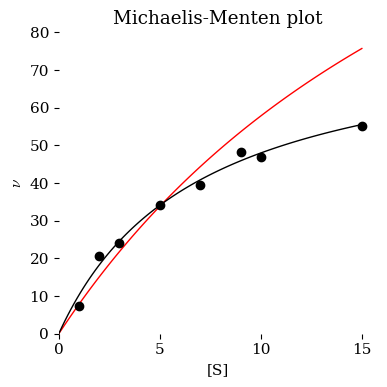

The Vmax is 81.0018
The KM is 6.8834
The red line is the predicted curve using Lineweaver-Burke results.


In [7]:
import matplotlib.pyplot as plt    # plotting tools
import numpy as np                 # we need the array object
import scipy                       # tools for science

#location_data = "data/"          # Use either local folder or github folder. 
#location_styles = "styles/"      # Use github locations for Colab
location_data = "https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/data/"
location_styles = "https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/styles/"

def MM(S, KM, Vmax):
    rate = Vmax * S/(KM+S)
    return(rate)

conc = [1.,  2.,  3.,  5.,  7.,  9., 10., 15.]          # units are mM
rate = [7.3, 20.7, 24.1, 34.3, 39.6, 48.2, 47.0, 55.2]  # units are uM/min

##### MATH COMMANDS #####

conc = np.array(conc) # Convert lists to numpy arrays to enable math operations 
rate = np.array(rate) #  that lists do not possess.

# calculate line fit and returns a list containing parameters
result = scipy.optimize.curve_fit(MM, conc, rate, p0 = [5,70])  

# extract the optimized parameter list (popt) and covariance matrix (pcov)
[popt, pcov] = result  
[KM, Vmax] = popt      # KM and Vmax were the two mitems i n the popt list

x_fit = np.linspace(0, np.max(conc), 100) # make x points for a smooth curve
y_fit = MM(x_fit, KM, Vmax)    # Calculate predicted curve using parameters

##### PLOT COMMANDS #####

##########THIS IS THE ONLY NEW CODE##################
plt.rcdefaults()   # reset style to defaults
style = "tufte.mplstyle"
plt.style.use(location_styles+style)  # apply style-sheet file
#####################################################

plt.figure(figsize=(4,4))    # create a new blank plot

# plot the LB line as red for comparison
plt.plot(x_fit, MM(x_fit, KM_lb, vmax_lb), "r-")  
plt.plot(conc, rate, "ko")   # plot the data as black "k" points "o"
plt.plot(x_fit, y_fit, "k-") # plot the predicted line as black "k" line "-"

plt.xlim(0,None)          # set axis limits so the plot starts at the origin
plt.ylim(0,80)
plt.xlabel(r"[S]")        # label the two axis
plt.ylabel(r"$\nu$")
plt.title(r"Michaelis-Menten plot")
plt.tight_layout()        # Prevents axis lables from falling off edge of plot
plt.savefig("plots/basics_plot4.pdf")   # save the plot to this file
plt.show()                # show the plot in this notebook and clear it

plt.rcdefaults()   # reset style to defaults

##### PRINT REPORT #####

print(f"The Vmax is {Vmax:0.4f}") 
print(f"The KM is {KM:0.4f}") 
print("The red line is the predicted curve using Lineweaver-Burke results.")


## What's Next

There is much more to plotting and data analysis that *Python* has available. You will find it when you need it. Search and you shall find. You will see examples of more advanced plotting in the next few notebooks. If you like what you see, just steal it and change it to suit your needs.